<a href="https://colab.research.google.com/github/noobylub/Computational-Linguistic/blob/master/LELA60331_Week_10_Seminar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 10 Seminar notebook: Multilayer neural networks


Problem 1: Given the weights and the input vector below, write the code to calculate the predicted output value y_hat, assuming the model described in the week 9 lecture.

In [1]:
import numpy as np
weights_0_1=np.array([[-.59,.75,-.95],[.34,-.17,.12],[-.72,-.6,.6]])
weights_1_2=np.array([[.93],[-.37],[.38]])
layer_0 = np.array([[ 0, 1, 1 ]])


In [2]:
layer_1 = np.maximum(np.dot(layer_0,weights_0_1),0)
layer_2 = np.dot(layer_1,weights_1_2)
print(layer_2)

[[0.2736]]


Problem 2: Given the true label y=1, and the learning rate as specified below, write the code to perform the backwards pass and update the weights. You should obtain the same weights at t2 as on the week 9 slides.

In [3]:
true_label = np.array([[1]])
learning_rate=0.2
layer_2_diff = (layer_2 - true_label)
print(layer_2_diff)
# layer_1_delta=np.zeros((3,3))

# layer_1_delta[0,0]=layer_2_diff*weights_1_2[0]*(layer_1[0,0]>0)*layer_0[0,0]
# layer_1_delta[0,1]=layer_2_diff*weights_1_2[1]*(layer_1[0,1]>0)*layer_0[0,0]
# layer_1_delta[0,2]=layer_2_diff*weights_1_2[2]*(layer_1[0,2]>0)*layer_0[0,0]

# layer_1_delta[1,0]=layer_2_diff*weights_1_2[0]*(layer_1[0,0]>0)*layer_0[0,1]
# layer_1_delta[1,1]=layer_2_diff*weights_1_2[1]*(layer_1[0,1]>0)*layer_0[0,1]
# layer_1_delta[1,2]=layer_2_diff*weights_1_2[2]*(layer_1[0,2]>0)*layer_0[0,1]

# layer_1_delta[2,0]=layer_2_diff*weights_1_2[0]*(layer_1[0,0]>0)*layer_0[0,2]
# layer_1_delta[2,1]=layer_2_diff*weights_1_2[1]*(layer_1[0,1]>0)*layer_0[0,2]
# layer_1_delta[2,2]=layer_2_diff*weights_1_2[2]*(layer_1[0,2]>0)*layer_0[0,2]


# weights_0_1[0,0] -= learning_rate * layer_1_delta[0,0]
# weights_0_1[0,1] -= learning_rate * layer_1_delta[0,1]
# weights_0_1[0,2] -= learning_rate * layer_1_delta[0,2]
# weights_0_1[1,0] -= learning_rate * layer_1_delta[1,0]
# weights_0_1[1,1] -= learning_rate * layer_1_delta[1,1]
# weights_0_1[1,2] -= learning_rate * layer_1_delta[1,2]
# weights_0_1[2,0] -= learning_rate * layer_1_delta[2,0]
# weights_0_1[2,1] -= learning_rate * layer_1_delta[2,1]
# weights_0_1[2,2] -= learning_rate * layer_1_delta[2,2]


# weights_1_2[0] -= (learning_rate * (layer_1[0,0]*layer_2_diff))[0]
# weights_1_2[1] -= (learning_rate * (layer_1[0,1]*layer_2_diff))[0]
# weights_1_2[2] -= (learning_rate * (layer_1[0,2]*layer_2_diff))[0]

# print(weights_0_1)
# print(weights_1_2)

[[-0.7264]]


A more succinct version

In [5]:
true_label = np.array([[1]])
learning_rate=0.2
layer_2_diff = (layer_2 - true_label)

layer_1_delta = (weights_1_2*layer_2_diff)*(layer_1>0).T*layer_0


weights_0_1 -= learning_rate*layer_1_delta.T


weights_1_2 -= learning_rate * (layer_1*layer_2_diff).T


print(weights_0_1)
print(weights_1_2)

[[-0.59        0.75       -0.95      ]
 [ 0.34       -0.17        0.24560932]
 [-0.72       -0.6         0.72560932]]
[[ 0.93     ]
 [-0.37     ]
 [ 0.5892032]]


Problem 3. Given the training data below, complete the code to train the network to solve the problem. You can use the code in the block below the training block to test that the models predictions from the training inputs are approximately correct.

In [6]:
inputs = np.array( [[ 0, 0, 1 ],
                          [ 0, 1, 1 ],
                          [ 1, 0, 1 ],
                          [ 1, 1, 1 ] ] )

true_labels = np.array([ [0], [1], [1], [0]])

/tmp/ipython-input-1612548516.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  layer_1_delta[0,0]=layer_2_diff*weights_1_2[0]*(layer_1[0]>0)*layer_0[0]
/tmp/ipython-input-1612548516.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  layer_1_delta[0,1]=layer_2_diff*weights_1_2[1]*(layer_1[1]>0)*layer_0[0]
/tmp/ipython-input-1612548516.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  layer_1_delta[0,2]=layer_2_diff*weights_1_2[2]*(layer_1[2]>0)*layer_0[0]
/

Text(0, 0.5, 'loss')

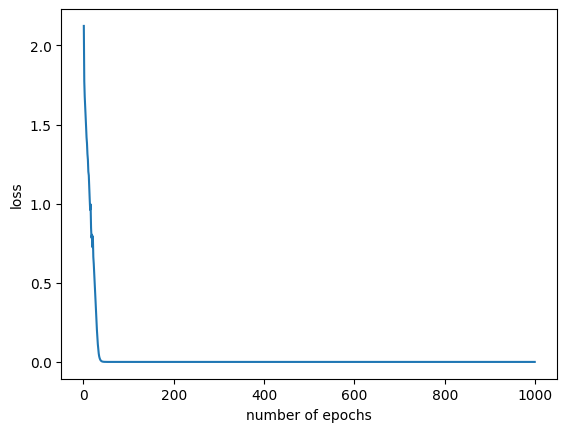

In [7]:
import numpy as np
import matplotlib.pyplot as plt

learning_rate = 0.35
num_features=3
hidden_size = 3
np.random.seed(1)
weights_0_1 = np.random.rand(num_features,hidden_size)
np.random.seed(1)
weights_1_2 = np.random.rand(hidden_size,1)
loss = []
n_iters=1000
for iteration in range(n_iters):
   layer_2_error = 0
   for i in range(len(inputs)):
      layer_0 = inputs[i]

      ## Add forward pass
      layer_1 = np.maximum(np.dot(layer_0,weights_0_1),0)
      layer_2 = np.dot(layer_1,weights_1_2)


      ## Add backward pass and update weights
      layer_2_error+=np.sum((layer_2-true_labels[i])**2)

      layer_2_diff = (layer_2 - true_labels[i])

      layer_1_delta=np.zeros((3,3))
      layer_1_delta[0,0]=layer_2_diff*weights_1_2[0]*(layer_1[0]>0)*layer_0[0]
      layer_1_delta[0,1]=layer_2_diff*weights_1_2[1]*(layer_1[1]>0)*layer_0[0]
      layer_1_delta[0,2]=layer_2_diff*weights_1_2[2]*(layer_1[2]>0)*layer_0[0]

      layer_1_delta[1,0]=layer_2_diff*weights_1_2[0]*(layer_1[0]>0)*layer_0[1]
      layer_1_delta[1,1]=layer_2_diff*weights_1_2[1]*(layer_1[1]>0)*layer_0[1]
      layer_1_delta[1,2]=layer_2_diff*weights_1_2[2]*(layer_1[2]>0)*layer_0[1]

      layer_1_delta[2,0]=layer_2_diff*weights_1_2[0]*(layer_1[0]>0)*layer_0[2]
      layer_1_delta[2,1]=layer_2_diff*weights_1_2[1]*(layer_1[1]>0)*layer_0[2]
      layer_1_delta[2,2]=layer_2_diff*weights_1_2[2]*(layer_1[2]>0)*layer_0[2]

      weights_0_1[0,0] -= learning_rate * layer_1_delta[0,0]
      weights_0_1[0,1] -= learning_rate * layer_1_delta[0,1]
      weights_0_1[0,2] -= learning_rate * layer_1_delta[0,2]
      weights_0_1[1,0] -= learning_rate * layer_1_delta[1,0]
      weights_0_1[1,1] -= learning_rate * layer_1_delta[1,1]
      weights_0_1[1,2] -= learning_rate * layer_1_delta[1,2]
      weights_0_1[2,0] -= learning_rate * layer_1_delta[2,0]
      weights_0_1[2,1] -= learning_rate * layer_1_delta[2,1]
      weights_0_1[2,2] -= learning_rate * layer_1_delta[2,2]

      weights_1_2[0] -= (learning_rate * (layer_1[0]*layer_2_diff))
      weights_1_2[1] -= (learning_rate * (layer_1[1]*layer_2_diff))
      weights_1_2[2] -= (learning_rate * (layer_1[2]*layer_2_diff))


   loss.append(layer_2_error)
plt.plot(range(1,n_iters),loss[1:])
plt.xlabel("number of epochs")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

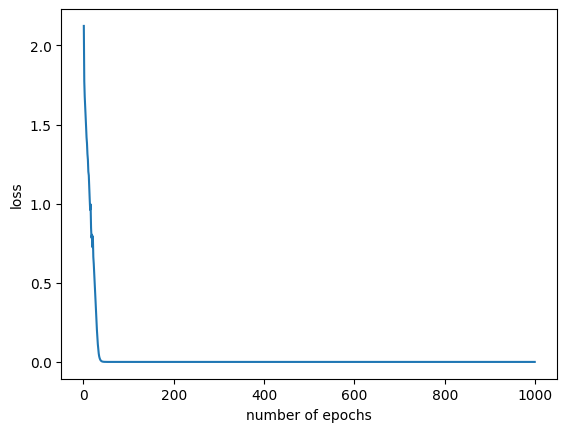

In [36]:
import numpy as np
import matplotlib.pyplot as plt

learning_rate = 0.35
num_features=3
hidden_size = 3
np.random.seed(1)
weights_0_1 = np.random.rand(num_features,hidden_size)
np.random.seed(1)
weights_1_2 = np.random.rand(hidden_size,1)
loss = []
n_iters=1000
for iteration in range(n_iters):
   layer_2_error = 0
   for i in range(len(inputs)):
      layer_0 = inputs[i]

      ## Add forward pass
      # Relu(Wx)
      layer_1 = np.maximum(np.dot(layer_0,weights_0_1),0)
      layer_2 = np.dot(layer_1,weights_1_2)


      ## Add backward pass and update weights
      # For reporting purposes
      layer_2_error+=np.sum((layer_2-true_labels[i])**2)

      # layer_2_diff = (layer_2 - true_labels[i])


      # layer_1_delta=np.zeros((3,3))
      # Ask it why why the code below in line 44 works especially given the lines at code 31-43
      # layer_1_delta[0,0]=layer_2_diff*weights_1_2[0]*(layer_1[0]>0)*layer_0[0]
      # layer_1_delta[0,1]=layer_2_diff*weights_1_2[1]*(layer_1[1]>0)*layer_0[0]
      # layer_1_delta[0,2]=layer_2_diff*weights_1_2[2]*(layer_1[2]>0)*layer_0[0]

      # layer_1_delta[1,0]=layer_2_diff*weights_1_2[0]*(layer_1[0]>0)*layer_0[1]
      # layer_1_delta[1,1]=layer_2_diff*weights_1_2[1]*(layer_1[1]>0)*layer_0[1]
      # layer_1_delta[1,2]=layer_2_diff*weights_1_2[2]*(layer_1[2]>0)*layer_0[1]

      # layer_1_delta[2,0]=layer_2_diff*weights_1_2[0]*(layer_1[0]>0)*layer_0[2]
      # layer_1_delta[2,1]=layer_2_diff*weights_1_2[1]*(layer_1[1]>0)*layer_0[2]
      # layer_1_delta[2,2]=layer_2_diff*weights_1_2[2]*(layer_1[2]>0)*layer_0[2]
      # layer_1_delta = np.dot(layer_2_diff, weights_1_2.T) * (layer_1>0).astype(float)
      # # layer_1_delta = (weights_1_2 @ layer_2_diff)*(layer_1>0).T*layer_0
      # layer_1_delta = np.dot(weights_1_2.T,layer_2_diff) * (z1 > 0).astype(float)


      # # hidden_delta = (layer_2_diff @ weights_1_2.T) * relu_grad   # (1,3)
      # # hidden_delta = np.dot(layer_2_diff, weights_1_2.T) * relu_grad
      # weights_0_1 -= learning_rate * np.dot(layer_1_delta, layer_0)   # (3,3)
      # # weights_0_1 -= learning_rate * (layer_0.T @ hidden_delta)   # (3,3)

      # # weights_0_1[0,0] -= learning_rate * layer_1_delta[0,0]
      # # weights_0_1[0,1] -= learning_rate * layer_1_delta[0,1]
      # # weights_0_1[0,2] -= learning_rate * layer_1_delta[0,2]
      # # weights_0_1[1,0] -= learning_rate * layer_1_delta[1,0]
      # # weights_0_1[1,1] -= learning_rate * layer_1_delta[1,1]
      # # weights_0_1[1,2] -= learning_rate * layer_1_delta[1,2]
      # # weights_0_1[2,0] -= learning_rate * layer_1_delta[2,0]
      # # weights_0_1[2,1] -= learning_rate * layer_1_delta[2,1]
      # # weights_0_1[2,2] -= learning_rate * layer_1_delta[2,2]
      # weights_0_1 -= learning_rate*layer_1_delta.T

      # # weights_1_2[0] -= (learning_rate * (layer_1[0]*layer_2_diff))
      # # weights_1_2[1] -= (learning_rate * (layer_1[1]*layer_2_diff))
      # # weights_1_2[2] -= (learning_rate * (layer_1[2]*layer_2_diff))
      # weights_1_2 -= learning_rate * np.dot(layer_1.T, layer_2_diff)

      # DIFFERENT SOLUTION -------------


      layer_2_diff = (layer_2 - true_labels[i]) # Corrected to use true_labels[i] instead of global true_label

      # We are moving backward, from the last step to the first step

      # pre-activation (needed for ReLU derivative)
      # This is the partial derivative for activation part, the very last step
      z1 = np.dot(layer_0, weights_0_1)
      relu_grad = (z1 > 0).astype(float)


      weights_1_2 -= learning_rate * np.dot(layer_1.reshape(-1, 1), layer_2_diff.reshape(1,1))

      # hidden delta (1,3)
      # layer_2_diff is (1,), weights_1_2.T is (1,3). Reshape layer_2_diff to (1,1) for dot product.
      # np.dot((1,1), (1,3)) gives (1,3).
      # relu_grad is (3,). Element-wise multiplication (1,3) * (3,) gives (1,3) by broadcasting.
      # Reshape apparently changes how python sees the value, it is already 1,1, but need to make sure of that with .reshape(1,1)

      # This hidden delta will be used to update the weights
      hidden_delta = np.dot(layer_2_diff.reshape(1,1), weights_1_2.T) * relu_grad.T

      # Remember CHAIN RULE

      # gradient for weights_0_1 (3,3)
      # layer_0 needs to be (3,1) for dot product with hidden_delta (1,3).
      # np.dot((3,1), (1,3)) gives (3,3).
      weights_0_1 -= learning_rate * np.dot(layer_0.reshape(-1, 1), hidden_delta)

      # gradient for weights_1_2 (3,1)
      # layer_1 needs to be (3,1) for dot product with layer_2_diff (1,1).
      # np.dot((3,1), (1,1)) gives (3,1).




   loss.append(layer_2_error)
plt.plot(range(1,n_iters),loss[1:])
plt.xlabel("number of epochs")
plt.ylabel("loss")

In [33]:
layer_2_diff.shape


(1,)

You can view the results as follows

In [37]:
np. set_printoptions(suppress=True)
for k in range(4):
  layer_0 = inputs[k]
  layer_1 = np.maximum(np.dot(layer_0,weights_0_1),0)
  layer_2 = np.dot(layer_1,weights_1_2)
  print(layer_2)

[0.]
[1.]
[1.]
[0.]


Problem 4: Once you have a model that makes good predictions, try lowering the learning rate. What do you notice? Why do you think this happens?

Problem 5. Examine the weights in your model. Give a verbal explanation of why they give the correct answer to the XOR problem

Problem 6 (hard problem to try if you have time): rewrite the code you wrote above so that it calculates deltas and updates weights using vector and/or matrix operations rather than element by element